In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
df = pd.read_excel("Lecture_CostsBatteryStorageSystems.xlsx", skiprows= 4)

In [4]:
print(df.head())

               Company / Product  Capacity in kWh  Price in €
0  Axitex BatterieSpeicher LiSV2             6.70        2300
1        Axitex AXIstorage Li 10            10.10        3180
2        Axitex AXIstorage Li 15            16.90        4000
3          BYD B-Box premium HVS             5.12        2304
4          HUAWEI LUNA2000-10-S0            10.00        3400


In [5]:
# Find the columns that are needed for the plot
x=df['Capacity in kWh']
y=df['Price in €']


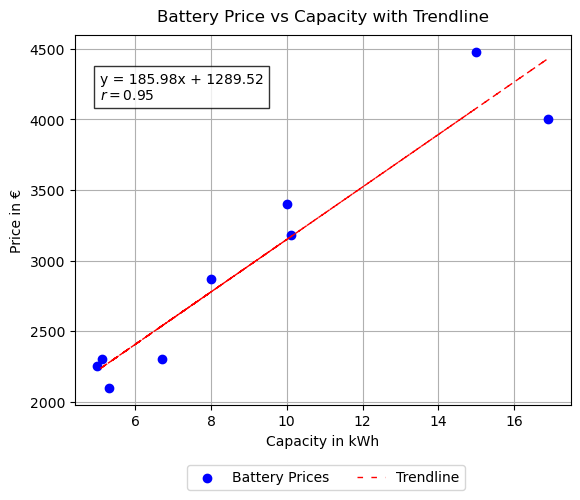

In [6]:
# Fit a linear trendline to the data
coeffs = np.polyfit(x, y, 1)
trendline = np.poly1d(coeffs)

# Calculate r value
r_value, _ = stats.pearsonr(x, y)

# Prepare equation and r value text
equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}\n$r = {r_value:.2f}$"


# Plot the trendline
plt.scatter(x, y, color='blue', label='Battery Prices', zorder=2)
plt.plot(x, trendline(x), color='red', label= 'Trendline', linestyle='--', linewidth=1, dashes=(4, 6))
plt.legend(loc='lower right', bbox_to_anchor=(0.8, -0.25), ncol=2)
plt.xlabel('Capacity in kWh')
plt.ylabel('Price in €')
plt.title('Battery Price vs Capacity with Trendline', pad=10)
plt.grid(True, zorder=1)

# Add the box with the equation and r value
plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# show plot
plt.show()

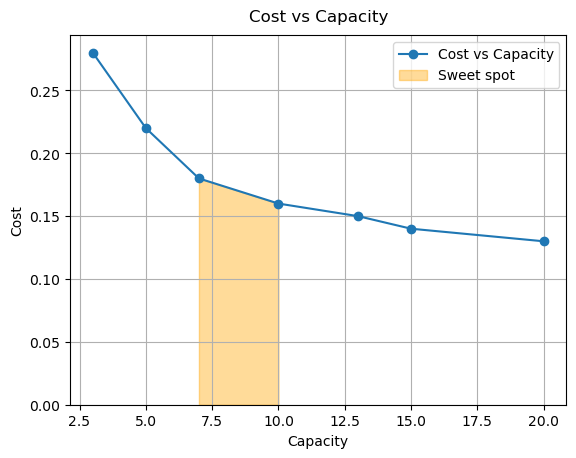

In [8]:
data = {
    'Capacity': [3, 5, 7, 10, 13, 15, 20],
    'Cost': [0.28, 0.22, 0.18, 0.16, 0.15, 0.14, 0.13]
}

df_utility = pd.DataFrame(data)
plt.plot(df_utility['Capacity'], df_utility['Cost'], marker='o', label='Cost vs Capacity')

#Highlight the high utility area
highlight_df = df_utility[(df_utility['Capacity'] >= 7) & (df_utility['Capacity'] <= 10)]
plt.fill_between(highlight_df['Capacity'], highlight_df['Cost'], alpha=0.4, color='orange', label='Sweet spot')

# Set axes to start from 0
plt.ylim(0)

# Labeling
plt.title('Cost vs Capacity', pad=10)
plt.xlabel('Capacity')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

#Save the plot
plt.savefig("cost_vs_capacity.png", dpi=300, bbox_inches="tight")
# Show plot
plt.show()